<a href="https://colab.research.google.com/github/jinkim-com/qm2coursework/blob/main/NLP_Trump_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!pip install gensim
!pip install scikit-learn
!python -m spacy download en_core_web_sm

import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
nltk.download('punkt_tab')


Importing the CSV files

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Trump_2020.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cleaning the Data

**Our data may still has some unwanted characters such as \n. This means we need to clean the data:**


In [7]:
# Removing all isntances of \n

df['Speech'] = df['Speech'].str.replace('\n', '', regex=False)

We also need to check that all the speeches are before the election (and are therefore part of the campaign). We can then remove unwanted speeches from the data.

In [8]:
df.sort_values(by=['Date'], inplace=True, ascending=False)
df.head()

,Speech,Date
19,"Well, thank you very much and I’m thrilled to ...",8/9/20
18,"Well, thank you very much. Thank you.Thank you...",8/9/20
34,"Hello, everybody. Hello, Duluth. Hello, Duluth...",30/9/20
1,I worked so hard for this state. I worked so ...,30/1/20
17,"So thank you Pennsylvania, very much. I’m thri...",3/9/20


# Finding the frequency of regular expressions affliated with voter issues

In [9]:
# We created a function that will take a list of words which are affliated with topics of voter importance and display a table of how many times they collectively occcur in each speech.

def count_words(words) :
    # Creating a table which shows the date and frequency of the words being used
    df[f'{words[0]}'] = df['Speech'].apply(lambda x: sum(len(re.findall(r'\b' + word + r'\b', x, re.IGNORECASE)) for word in words))
    print(df[['Date',f'{words[0]}']])
    capitalised_words = [word.capitalize() for word in words]
    title = capitalised_words[0]

    # Creating the graph
    df['Date'] = pd.to_datetime(df['Date']) # Convert 'Date' column to datetime
    df['Month'] = df['Date'].dt.month
    monthly=df.groupby('Month')[f'{words[0]}'].sum()
    monthly.plot()
    plt.xlabel("Month")
    plt.ylabel(f"No. of times the {title} was mentioned")
    plt.title(f"Frequency of {title} mentioned in Trump's campaign speeches in 2016")


          Date  Economy
19      8/9/20        2
18      8/9/20       20
34     30/9/20        7
1      30/1/20       15
17      3/9/20       11
16     28/8/20        8
6      28/2/20        1
0      28/1/20       13
33     27/9/20        5
15     27/8/20       11
32     26/9/20        6
31     25/9/20        2
30     24/9/20        3
14     24/8/20        7
9      23/6/20        7
29     22/9/20        9
27     21/9/20       10
28     21/9/20       10
8      21/6/20        7
5      21/2/20        7
4      21/2/20        3
13     20/8/20        7
3      20/2/20       11
7       2/3/20       12
26     19/9/20        6
25     18/9/20        1
24     17/9/20       17
12     17/8/20       12
11     17/8/20       22
40  16/10/2020        3
39  15/10/2020       10
23     14/9/20        5
10     14/8/20        4
38  14/10/2020       15
22     13/9/20        6
37  13/10/2020        6
21     12/9/20       10
36  12/10/2020       10
20     10/9/20       11
2      10/2/20        4
35  10/10/2020  

<ipython-input-9-81ef58555d70>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']) # Convert 'Date' column to datetime


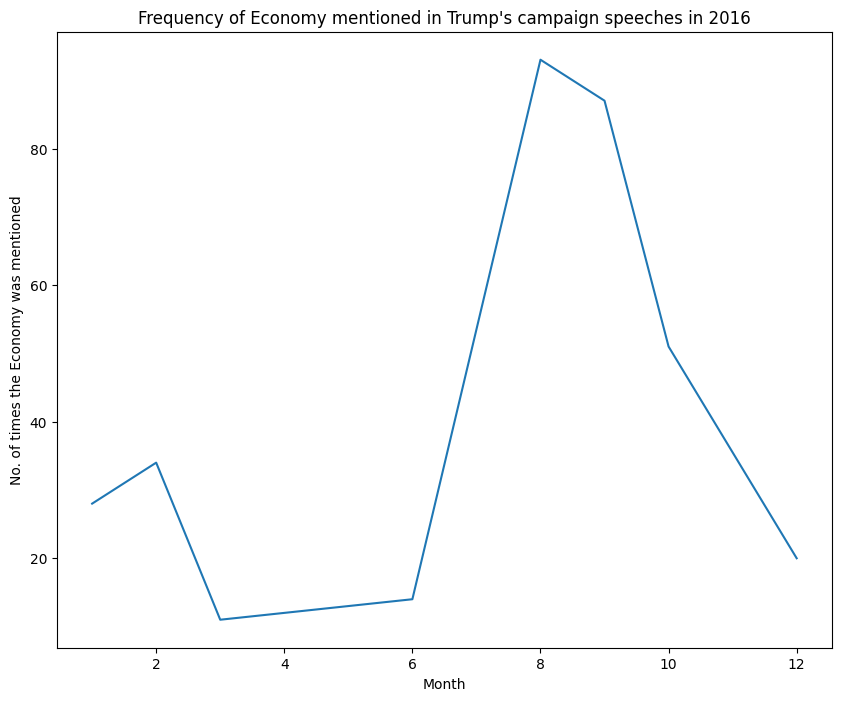

In [10]:
economy_words = ['Economy', 'Economic', 'Inflation', 'Tax']
count_words(economy_words)


         Date  terrorism
19 2020-08-09          0
18 2020-08-09          4
34 2020-09-30          3
1  2020-01-30          2
17 2020-03-09          1
16 2020-08-28          2
6  2020-02-28          1
0  2020-01-28          2
33 2020-09-27          2
15 2020-08-27          3
32 2020-09-26          2
31 2020-09-25          0
30 2020-09-24          3
14 2020-08-24          0
9  2020-06-23          0
29 2020-09-22          2
27 2020-09-21          3
28 2020-09-21          0
8  2020-06-21          0
5  2020-02-21          1
4  2020-02-21          1
13 2020-08-20          2
3  2020-02-20          1
7  2020-02-03          5
26 2020-09-19          1
25 2020-09-18          4
24 2020-09-17          3
12 2020-08-17          1
11 2020-08-17          0
40 2020-10-16          0
39 2020-10-15          2
23 2020-09-14          0
10 2020-08-14          0
38 2020-10-14          3
22 2020-09-13          4
37 2020-10-13          3
21 2020-12-09          4
36 2020-12-10          3
20 2020-10-09          2


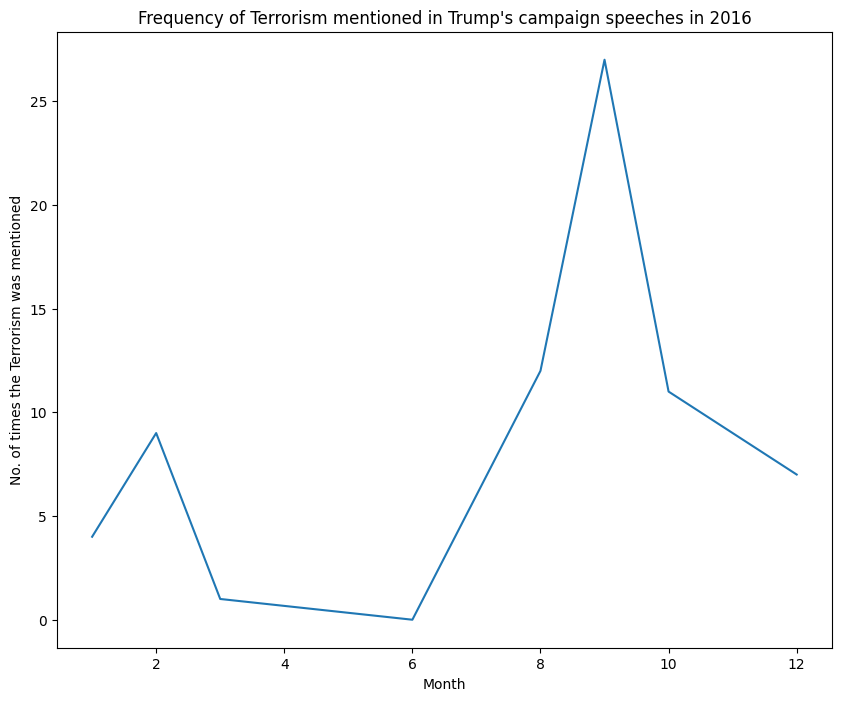

In [11]:
terrorism_words = ['terrorism', 'terrorists', 'attacks']
count_words(terrorism_words)

         Date  Supreme Court
19 2020-08-09              0
18 2020-08-09              0
34 2020-09-30              5
1  2020-01-30              1
17 2020-03-09              0
16 2020-08-28              1
6  2020-02-28              0
0  2020-01-28              2
33 2020-09-27              5
15 2020-08-27              1
32 2020-09-26              8
31 2020-09-25              2
30 2020-09-24              4
14 2020-08-24              2
9  2020-06-23              3
29 2020-09-22              8
27 2020-09-21              9
28 2020-09-21              8
8  2020-06-21              6
5  2020-02-21              1
4  2020-02-21              3
13 2020-08-20              2
3  2020-02-20              3
7  2020-02-03              1
26 2020-09-19             10
25 2020-09-18              5
24 2020-09-17              1
12 2020-08-17              1
11 2020-08-17              0
40 2020-10-16              2
39 2020-10-15             11
23 2020-09-14              0
10 2020-08-14              0
38 2020-10-14 

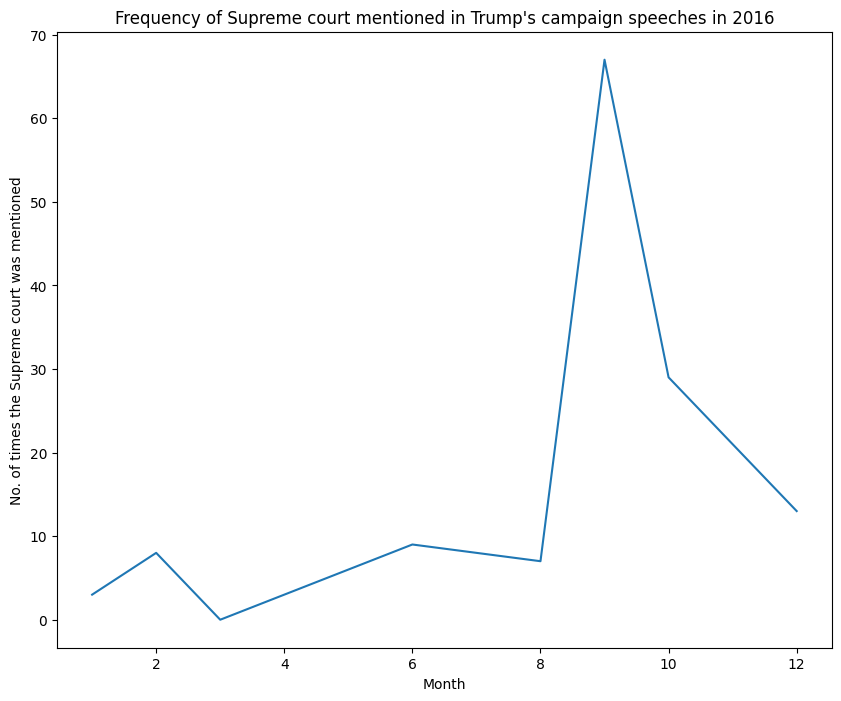

In [12]:
supreme_court_words = ['Supreme Court', 'Supreme Court Justice', 'Stras']
count_words(supreme_court_words)

         Date  Healthcare
19 2020-08-09           0
18 2020-08-09           8
34 2020-09-30           4
1  2020-01-30          20
17 2020-03-09          10
16 2020-08-28           6
6  2020-02-28          15
0  2020-01-28           3
33 2020-09-27          11
15 2020-08-27           4
32 2020-09-26           8
31 2020-09-25           3
30 2020-09-24          11
14 2020-08-24           5
9  2020-06-23          10
29 2020-09-22          15
27 2020-09-21           6
28 2020-09-21           8
8  2020-06-21          12
5  2020-02-21           5
4  2020-02-21          26
13 2020-08-20           3
3  2020-02-20          15
7  2020-02-03          12
26 2020-09-19          19
25 2020-09-18           3
24 2020-09-17          11
12 2020-08-17           7
11 2020-08-17           7
40 2020-10-16          14
39 2020-10-15          11
23 2020-09-14           0
10 2020-08-14           0
38 2020-10-14           6
22 2020-09-13           4
37 2020-10-13          11
21 2020-12-09          12
36 2020-12-1

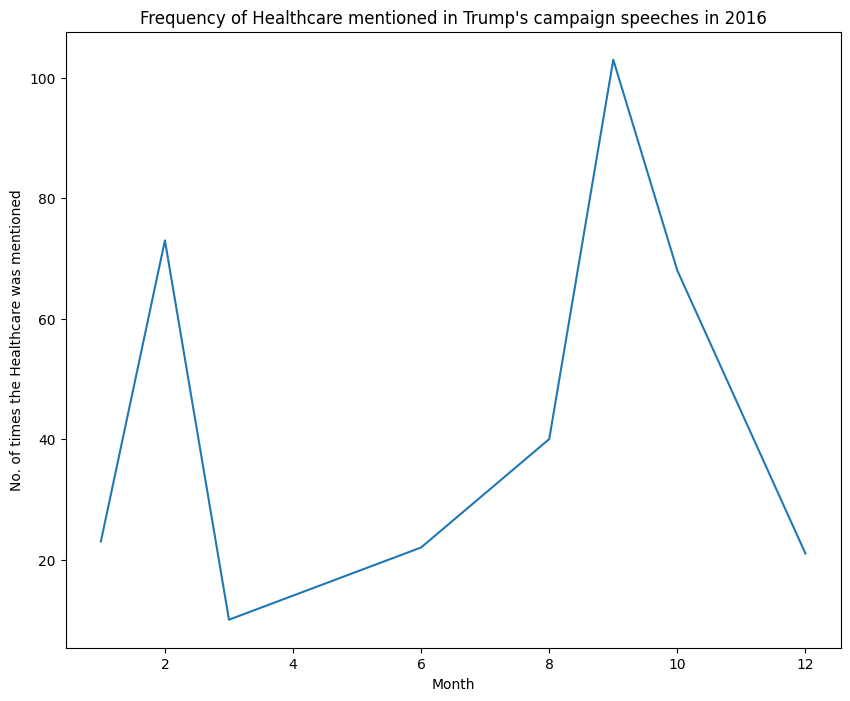

In [13]:
healthcare_words = ['Healthcare', 'Affordable Care Act', 'COVID', 'vaccine', 'coronavirus', 'Obamacare', 'health insurance']
count_words(healthcare_words)

         Date  Foreign Policy
19 2020-08-09               4
18 2020-08-09              36
34 2020-09-30              10
1  2020-01-30              22
17 2020-03-09              36
16 2020-08-28              28
6  2020-02-28               3
0  2020-01-28               1
33 2020-09-27              20
15 2020-08-27              18
32 2020-09-26               7
31 2020-09-25               4
30 2020-09-24              15
14 2020-08-24              26
9  2020-06-23              13
29 2020-09-22              13
27 2020-09-21              10
28 2020-09-21              56
8  2020-06-21              13
5  2020-02-21              10
4  2020-02-21              11
13 2020-08-20              14
3  2020-02-20               6
7  2020-02-03               1
26 2020-09-19              41
25 2020-09-18              19
24 2020-09-17              42
12 2020-08-17              41
11 2020-08-17              34
40 2020-10-16               4
39 2020-10-15              20
23 2020-09-14               3
10 2020-08

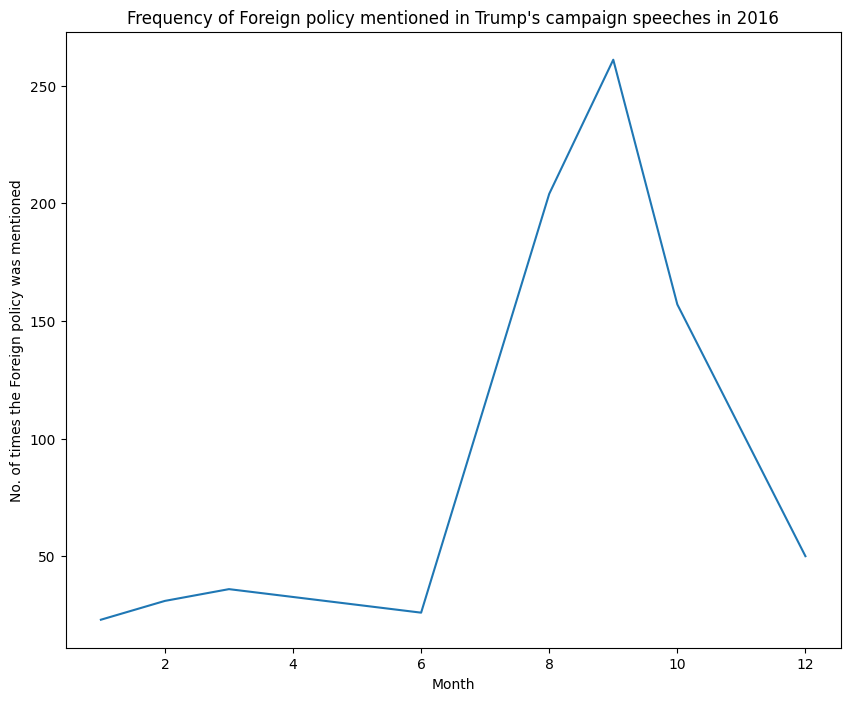

In [14]:
foreign_policy_words = ['Foreign Policy', 'tariffs', 'China', 'Putin', 'Xi']
count_words(foreign_policy_words)

# Finding average sentence length

In [15]:
# We created a function to find the length of each sentence
def sentence_length():
    for speech in df['Speech']:
        all_sentence_lengths = []
        doc = nlp(speech)
        for sentence in doc.sents:
            # Exclude the full stop from the word count
            num_words = len([token for token in sentence if not token.is_punct])
            all_sentence_lengths.append(num_words)

    return all_sentence_lengths

# Creating a table of summary statistics for the sentence lengths
word_count = pd.Series(sentence_length())
summary_stats = word_count.describe().to_frame().T
summary_stats.index = ['Sentence Length (Words)']

print(summary_stats)

KeyboardInterrupt: 

In [ ]:
def avg_sentence_length_per_speech(df):
    speech_sentence_lengths = []
    for speech in df['Speech']:
        sentences = nltk.sent_tokenize(speech)  # Sentence segmentation with NLTK
        sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
        avg_length = np.mean(sentence_lengths) if sentence_lengths else 0  # Handle empty speeches
        speech_sentence_lengths.append(avg_length)

    return pd.Series(speech_sentence_lengths, index=df.index)

avg_lengths_series = avg_sentence_length_per_speech(df)

# We then created a new column in the dataframe with the Average Sentence Length per Speech
df['Mean Sentence Length (Words)'] = avg_lengths_series
# df = df.drop(columns=['Mean Sentence Length(Words)'])

sent_summary_stats = df['Mean Sentence Length (Words)'].describe().to_frame().T
sent_summary_stats.index = ['Mean Sentence Length (Words)']


In [ ]:
sent_summary_stats





# Analysing Distinguishing Terms


In [ ]:
df['Month'] = df['Date'].dt.month
df.head()

In [ ]:
import scattertext as st

# create a corpus of text from the dataframe
corpus = st.CorpusFromPandas(df, # load the dataframe
                             category_col='Month', # indicate which column contains the category we want to distinguish by
                             text_col='Speech', # indicate which column stores the text to be analyzed
                             nlp=nlp).build() # load the NLP models used for analysis

# remove stopwords from the corpus of text
corpus=corpus.remove_terms(nlp.Defaults.stop_words, ignore_absences=True)

# now, we create the scatterplot
html = st.produce_scattertext_explorer(
                   corpus, # load the corpus
                   category="8", # indicate which category value we want to compare against all others; in this case, all rows in which "REX TILLERSON" is the speaker
                   category_name='August', # set the label on the plot as "Rex Tillerson"
                   not_category_name='Others', # set the label on the plot for all other speakers as "Others"
                   width_in_pixels=1000) #set the width

In [ ]:
# display the plot
display(HTML(html))

# Sentiment Analysis

In [33]:
def get_sentiment_scores_batch(texts):
    docs = nlp.pipe(texts)  # Process all texts in batch
    polarity_scores = [doc._.blob.polarity for doc in docs]
    return polarity_scores
# Apply the function to the 'Speech' column and create new columns
df['Polarity'] = get_sentiment_scores_batch(df['Speech']) # Assign the results directly to 'Polarity' column
df.head()


,Speech,Date,Economy,Month,terrorism,Supreme Court,Healthcare,Foreign Policy,Polarity,Subjectivity
19,"Well, thank you very much and I’m thrilled to ...",2020-08-09,2,8,0,0,0,4,0.243090,NaN
18,"Well, thank you very much. Thank you.Thank you...",2020-08-09,20,8,4,0,8,36,0.163156,NaN
34,"Hello, everybody. Hello, Duluth. Hello, Duluth...",2020-09-30,7,9,3,5,4,10,0.159592,NaN
1,I worked so hard for this state. I worked so ...,2020-01-30,15,1,2,1,20,22,0.160330,NaN
17,"So thank you Pennsylvania, very much. I’m thri...",2020-03-09,11,3,1,0,10,36,0.145187,NaN


In [25]:
sorted_polarity = df.sort_values(by=['Polarity'], ascending=False)
sorted_polarity.head()

,Speech,Date,Economy,Month,terrorism,Supreme Court,Healthcare,Foreign Policy,Polarity,Subjectivity
31,I don’t know. I don’t know. I don’t know about...,2020-09-25,2,9,0,2,3,4,0.265866,NaN
0,Thank you. Thank you. I love New Jersey and I’...,2020-01-28,13,1,2,2,3,1,0.243090,NaN
28,"Well thank you very much, Ohio. Thank you very...",2020-09-21,10,9,0,8,8,56,0.207018,NaN
40,Thank you. What a nice group. Thank you very ...,2020-10-16,3,10,0,2,14,4,0.204489,NaN
30,"Hello, Jacksonville. We love Jacksonville. We ...",2020-09-24,3,9,3,4,11,15,0.194689,NaN


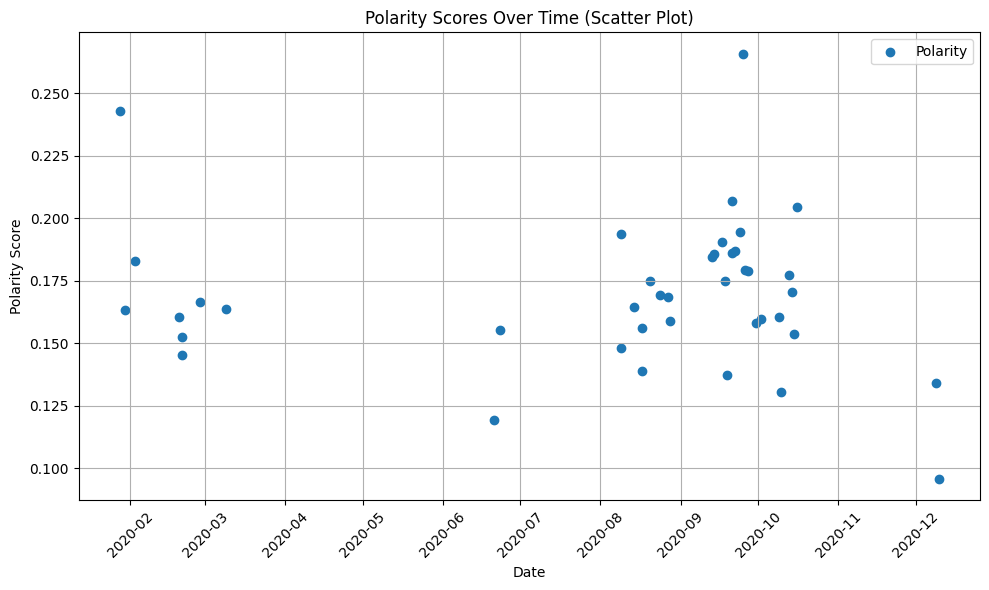

In [31]:
# Ensure 'Date' column is of datetime type:
df['Date'] = pd.to_datetime(df['Date'])

# Create the scatter plot:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df['Date'], df['Polarity'], label='Polarity')

# Customize the plot:
plt.xlabel('Date')
plt.ylabel('Polarity Score')
plt.title('Polarity Scores Over Time (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot:
plt.show()

# Topic Modelling: LDA Method